In [1]:
#  IMPORTS
import numpy as np
import pandas as pd
import sklearn
from sklearn.manifold import TSNE as t_sne
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as lle
import matplotlib.pyplot as plt
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 
from ipywidgets import *

# Importing Toy Datset: Swiss roll

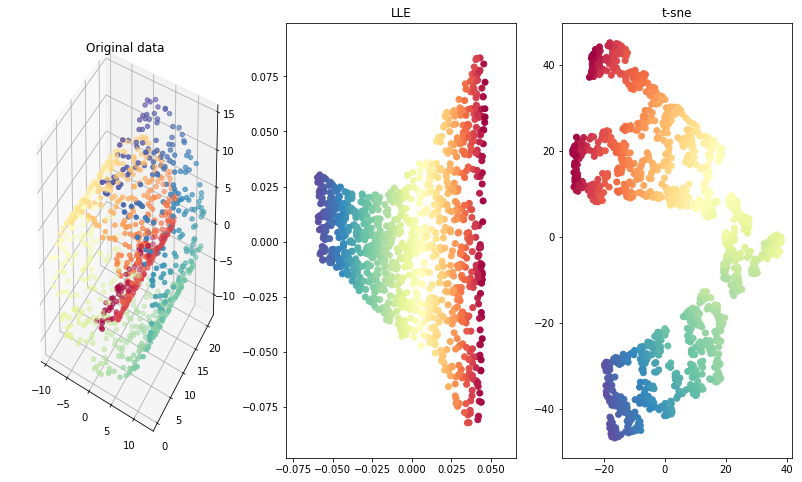

In [4]:
#how to make a swiss roll dataset and apply tsne and 
X, color=make_swiss_roll(1000, noise=0.01)
n_neighbors=12
n_components=2
Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
tsne=t_sne()
Z=tsne.fit_transform(X)
plot_comparison(X,Y,Z,color)

# Testing hyperparameters


## LLE: variation of number of neighbours

In [ ]:
max_neighbours=40
Y=[]
for i in range(max_neighbours):
    Y.append(lle(i+4, n_components,eigen_solver='auto').fit_transform(X))

def plot_y(X,Y,i):
    print('The number of neighbours is: ', i+4)
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(122)
    ax.set_title("LLE")
    ax.scatter(Y[i][:, 0], Y[i][:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()


interactive(plot_y, X=fixed(X), Y=fixed(Y), color=fixed(color), i=widgets.IntSlider(min=0,max=99,step=1, value=0))

## t-SNE: variation of Perplexity

In [5]:
Z=[]

per=np.arange(2,73,10) #51)
for p in per:
    tsne=t_sne(perplexity=p)
    Z.append(tsne.fit_transform(X))

In [6]:
def plot_Z(X,Z,i):
    print('The perpelxity is', per[i])
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(122)
    ax.set_title("t-SNE")
    ax.scatter(Z[i][:, 0], Z[i][:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()
interactive(plot_Z, X=fixed(X), Z=fixed(Z), color=fixed(color), i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


In [ ]:
print(len(per))

# Variation of Noise

In [3]:
#i do not really use this one anymore
def noise_effect(n):
    X, color=make_swiss_roll(1000, noise=n)
    n_neighbors=12
    n_components=2
    Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
    tsne=t_sne()
    Z=tsne.fit_transform(X)
    plot_comparison(X,Y,Z,color)
    
    
def plot_comparison(X, Y, Z, color):
    """ 
    Plots original data (X), LLE transformation (Y) and t-SNE transformation (Z)
    """
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.set_title("Original data")
    ax = fig.add_subplot(132)
    ax.set_title("LLE")
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax = fig.add_subplot(133)
    ax.set_title("t-sne")
    ax.scatter(Z[:, 0], Z[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.show()
    
def make_data(N=500):
    noise=np.linspace(0.01,1,20)
    Xs=[]
    Ys=[]
    Zs=[]
    colors=[]
    n_neighbors=12
    n_components=2
    for n in noise: 
        X, color=make_swiss_roll(N, noise=n)
        Y = lle(n_neighbors, n_components,eigen_solver='auto').fit_transform(X)
        tsne=t_sne()
        Z=tsne.fit_transform(X)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        colors.append(color)
    return Xs, Ys, Zs, noise, colors

def plot_interactive(K, Xs, Ys, Zs, colors, noise):
    print('Noise value: ', noise[K])
    plot_comparison(Xs[K], Ys[K], Zs[K], colors[K])
    #K is an index, an interger from 0 to 19
    

In [ ]:
X_s, Y_s, Z_s, noise, color=make_data(1000)



In [ ]:
a=interact(plot_interactive, K=widgets.IntSlider(min=0,max=19,step=1, value=0), Xs=fixed(X_s),Ys=fixed(Y_s), Zs=fixed(Z_s), colors=fixed(color), noise=fixed(noise))
